In [109]:
#Import the libraries and print their versions
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
from scipy import stats
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols

In [110]:
Wage = pd.read_csv("ISLR/data/Wage.csv",index_col=0)

In [111]:
r, c = Wage.shape
print(c)
for a, b in enumerate(Wage, 1):
    list = "".join('{}. \'{}\''.format(a, b))
    print (list, end=" ")

11
1. 'year' 2. 'age' 3. 'maritl' 4. 'race' 5. 'education' 6. 'region' 7. 'jobclass' 8. 'health' 9. 'health_ins' 10. 'logwage' 11. 'wage' 

In [112]:
Wage = Wage.drop(['logwage'], axis=1)
row, col = Wage.shape
print(col)
for a, b in enumerate(Wage, 1):
    list = "".join('{}. \'{}\''.format(a, b))
    print (list, end=" ")

10
1. 'year' 2. 'age' 3. 'maritl' 4. 'race' 5. 'education' 6. 'region' 7. 'jobclass' 8. 'health' 9. 'health_ins' 10. 'wage' 

In [113]:
len(Wage.index)

3000

In [114]:
Wage

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154
...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,87.981033


In [115]:
Wage.describe()

,year,age,wage
count,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,111.703608
std,2.026167,11.542406,41.728595
min,2003.000000,18.000000,20.085537
25%,2004.000000,33.750000,85.383940
50%,2006.000000,42.000000,104.921507
75%,2008.000000,51.000000,128.680488
max,2009.000000,80.000000,318.342430


In [116]:
Wage['maritl'].value_counts()

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [117]:
Wage['race'].value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [118]:
Wage['education'].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [119]:
Wage['region'].value_counts()

2. Middle Atlantic    3000
Name: region, dtype: int64

In [120]:
Wage['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [121]:
Wage['health'].value_counts()

2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

In [122]:
Wage['health_ins'].value_counts()

1. Yes    2083
2. No      917
Name: health_ins, dtype: int64

------------------------------------------------------------------------
<h1>NUMERICAL FEATURES</h1>

------------------------------------------------------------------------

<h2>Scatter plot</h2>
<h3>age ~ wage, year ~ age, year ~ wage:</h3>

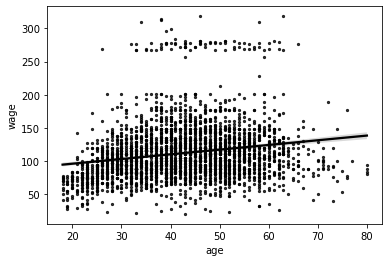

In [123]:
sns.regplot(x = "age", y = "wage", data=Wage, marker='o', color='black', scatter_kws={'s':5})

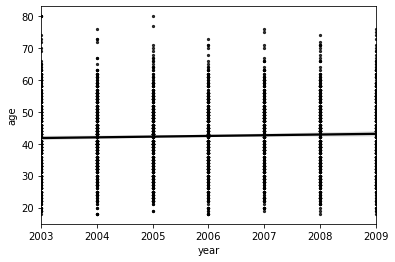

In [124]:
sns.regplot(x = "year", y = "age", data=Wage, marker='o', color='black', scatter_kws={'s':5})

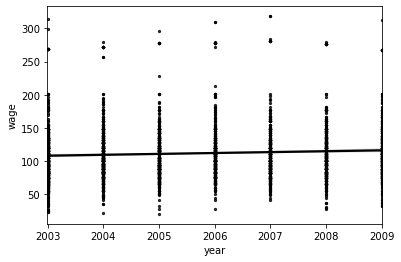

In [125]:
sns.regplot(x = "year", y = "wage", data=Wage, marker='o', color='black', scatter_kws={'s':5})

<h2>Shapiro Test</h2>
<h3>age, wage, year:</h3>

In [126]:
stat1, p1 = stats.shapiro(Wage['age'])
print('\nShapiro-Wilk normality test\n')
print('data: Wage[\'age\']\n' + 'W = %.5f' % stat1 + ' p-value = ' + str(p1))
stat2, p2 = stats.shapiro(Wage['wage'])
print('\n\nShapiro-Wilk normality test\n')
print('data: Wage[\'wage\']\n' + 'W = %.5f' % stat2 + ' p-value < ' + str(p2))
stat3, p3 = stats.shapiro(Wage['year'])
print('\n\nShapiro-Wilk normality test\n')
print('data: Wage[\'year\']\n' + 'W = %.5f' % stat3 + ' p-value < ' + str(p3))


Shapiro-Wilk normality test

data: Wage['age']
W = 0.99105 p-value = 9.371995367268848e-13


Shapiro-Wilk normality test

data: Wage['wage']
W = 0.87957 p-value < 2.466285297211678e-43


Shapiro-Wilk normality test

data: Wage['year']
W = 0.91106 p-value < 9.024160323272959e-39


<h2>QQ-plot</h2>
<h3>age, wage, year:</h3>

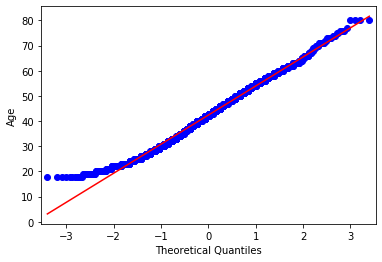

In [127]:
sm.qqplot(Wage['age'], line='s')
plt.ylabel("Age")
plt.show()

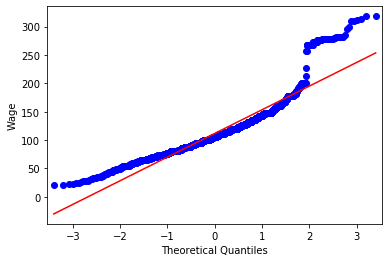

In [128]:
sm.qqplot(Wage['wage'], line='s')
plt.ylabel("Wage")
plt.show()

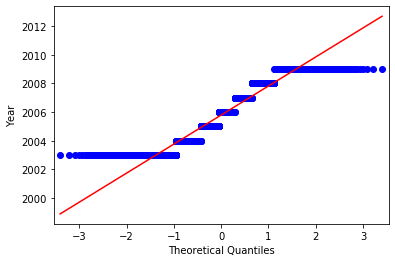

In [129]:
sm.qqplot(Wage['year'], line='s')
plt.ylabel("Year")
plt.show()

<h2>Correlation Test</h2>
<h3>age~wage, year~age, year~wage:</h3>

In [130]:
r, p = stats.pearsonr(Wage['age'], Wage['wage']) # r, p =(0.19563720156358874, 2.9007776751953376e-27)
r_z = np.arctanh(r) # r_z = 0.19819206804107747
se = 1/np.sqrt(Wage['age'].size-3) # se = 0.018266554145039696
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se # lo_z, hi_z =(0.16239027979514883, 0.2339938562870061)
lo, hi = np.tanh((lo_z, hi_z))
print('95 percent confidence interval:')
print(lo, hi)
print('sample estimates: cor')
print(Wage['age'].corr(Wage['wage']))

95 percent confidence interval:
0.1609777345954282 0.2298147289885717
sample estimates: cor
0.19563720156358858


In [131]:
r, p = stats.pearsonr(Wage['year'], Wage['age']) # r, p =(0.19563720156358874, 2.9007776751953376e-27)
r_z = np.arctanh(r) # r_z = 0.19819206804107747
se = 1/np.sqrt(Wage['year'].size-3) # se = 0.018266554145039696
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se # lo_z, hi_z =(0.16239027979514883, 0.2339938562870061)
lo, hi = np.tanh((lo_z, hi_z))
print('95 percent confidence interval:')
print(lo, hi)
print('sample estimates: cor')
print(Wage['year'].corr(Wage['age']))

95 percent confidence interval:
0.0026417915351769116 0.07410925151262815
sample estimates: cor
0.03842465840501797


In [132]:
r, p = stats.pearsonr(Wage['year'], Wage['wage']) # r, p =(0.19563720156358874, 2.9007776751953376e-27)
r_z = np.arctanh(r) # r_z = 0.19819206804107747
se = 1/np.sqrt(Wage['year'].size-3) # se = 0.018266554145039696
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se # lo_z, hi_z =(0.16239027979514883, 0.2339938562870061)
lo, hi = np.tanh((lo_z, hi_z))
print('95 percent confidence interval:')
print(lo, hi)
print('sample estimates: cor')
print(Wage['year'].corr(Wage['wage']))

95 percent confidence interval:
0.029827742378506238 0.10109365222970737
sample estimates: cor
0.06554427797296265


<h2>Interpretation</h2>
<h3>Scatter plot</h3>

Scatter plots are used to identify the relationship between two variables, as in our case between: age - wage, year - age and year - wage. In general, the closer the data comes to making a straight line, the stronger the correlation.  
All three scatter plots show positive association (the line slopes up). The first scenario has a weak association with a couple of outliers in the same direction, where people between the ages of ~32 until ~65 had a wage above 250. Where, all other people from age ~18 until 80, had a wage raging from below 50 to 200.  
The second and third scenario have weak associations, and show the ages of people at a certain year, and the wages of the people in a certain year.

<h3>Shapiro test</h3>

Age:  
p-value = 9.371995367268848e-13  
decimal form: 0.0000000000009372  

Wage:  
p-value < 2.466285297211678e-43  
decimal form: 0.0000000000000000000000000000000000000000002466  

Year:  
p-value < 9.024160323272959e-39  
decimal form: 0.000000000000000000000000000000000000009024  

The output for age, wage and year shows for all:  
The p-value is less than the alpha level (0.05), thus the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.  

However, the Shapiro-Wilk test is popular to determine normality, but it's not universally best. A QQ plot is a better visualization of data, which provides more certainty about the normality, rather than relying on the p-value from the Shapiro-Wilk test.


<h3>QQ plot</h3>

The red line in the QQ plots shows where the points would fall if the dataset were normally distributed. The points in the first QQ plot form a relatively straight line. This is, because the quantiles of the dataset almost match what the quantiles of the dataset would  theoretically be if the dataset was normally distributed. The QQ plot also has 'thin tails' that correspond to the first quantiles occurring at greater than expected values and the last quantiles occurring at smaller than expected values.  

Looking at the second QQ plot, most of the data is distributed on the left side with a somewhat 'long tail'. As we follow the line upwards, it is visible that the dataset should continue around 150 to 200, when in fact, those quantiles depart the red line and are at 300. This means that the quantiles are greater than the theoretical quantiles (=there is a greater concentration of data beyond the right side of a Gaussian distribution).  

The third QQ plot has 'spikes' of idential values. This is because a batch of numbers is compared to a theoretical distribution. Thus, this plot shows a significant deviation from a straight line, simply put: the range of values between both sets of numbers do not match

<h3>Correlation test</h3>

age~wage:  
sample estimates: cor  
0.19563720156358858  

year~age:  
sample estimates: cor  
0.03842465840501797  

year~wage:  
sample estimates: cor  
0.06554427797296265  

The Pearson method is used by pandas by default.  
A co-efficient close to 1 means that there’s a very strong positive 
correlation between the two variables. Experts do not consider correlations significant until the value surpasses at least 0.8. In our case, the first scenario has 0.196 which means that there is a positive correlation, but it is weak and likely insignificant.  
The second and third scenario show 0.038 and 0.066 which also indicate a negligible correlation.  
Thus, since the correlation indicates the interdependence between the variables and all results show insignificant correlation, it can be concluded that the compared wage ~ age and year ~ age and year ~ wage have nothing to do with each other. They have no relationship, connection and there is no interdependence between any of them. 

------------------------------------------------------------------------
<h1>NON-NUMERICAL FEATURES</h1>

------------------------------------------------------------------------

<h2>education:</h2>

In [133]:
sorted(Wage['education'].unique())

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

<h2>Boxplot</h2>
<h3>education~wage/age/year:</h3>

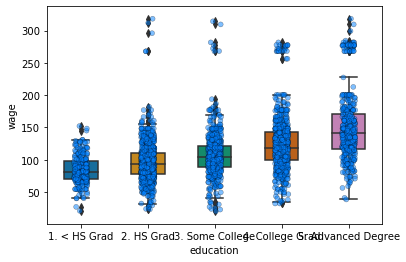

In [134]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='education', y='wage', data=Wage, width=0.5, order = sorted(Wage['education'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='education', y='wage', data=Wage, order = sorted(Wage['education'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

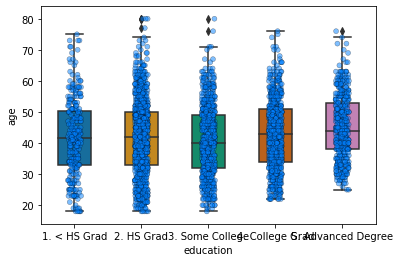

In [135]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='education', y='age', data=Wage, width=0.5, order = sorted(Wage['education'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='education', y='age', data=Wage, order = sorted(Wage['education'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

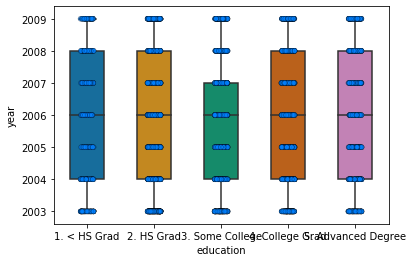

In [136]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='education', y='year', data=Wage, width=0.5, order = sorted(Wage['education'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='education', y='year', data=Wage, order = sorted(Wage['education'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>education~wage/age/year:</h3>

In [137]:
mod = ols('wage ~ education', data=Wage).fit()
#mod.summary()

aov_table = sm.stats.anova_lm(mod, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    cols = ['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
education,4.0,1.226364e+06,306591.121218,229.805921,2.915932e-172
Residual,2995.0,3.995721e+06,1334.130646,NaN,NaN


In [138]:
mod = ols('age ~ education', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
education,4.0,4607.585231,1151.896308,8.735313,5.226851e-07
Residual,2995.0,394940.569436,131.866634,NaN,NaN


In [139]:
mod = ols('year ~ education', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
education,4.0,12.482946,3.120736,0.759919,0.551295
Residual,2995.0,12299.474054,4.106669,NaN,NaN


<h2>maritl:</h2>

In [140]:
sorted(Wage['maritl'].unique())

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

<h2>Boxplot</h2>
<h3>maritl~wage/age/year:</h3>

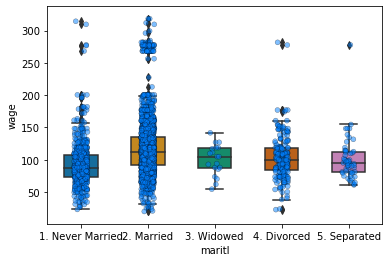

In [141]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='maritl', y='wage', data=Wage, width=0.5, order = sorted(Wage['maritl'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='maritl', y='wage', data=Wage, order = sorted(Wage['maritl'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

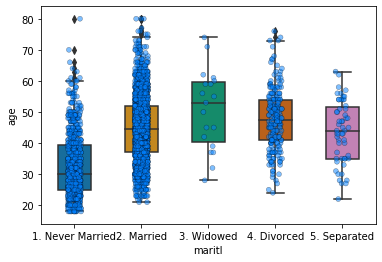

In [142]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='maritl', y='age', data=Wage, width=0.5, order = sorted(Wage['maritl'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='maritl', y='age', data=Wage, order = sorted(Wage['maritl'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

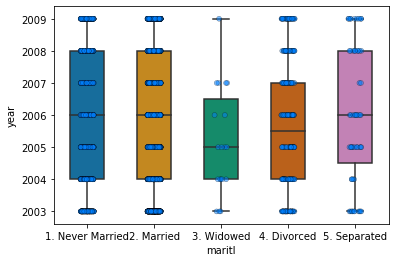

In [143]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='maritl', y='year', data=Wage, width=0.5, order = sorted(Wage['maritl'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='maritl', y='year', data=Wage, order = sorted(Wage['maritl'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>maritl~wage/age/year:</h3>

In [144]:
mod = ols('wage ~ maritl', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
maritl,4.0,3.631444e+05,90786.091095,55.959585,1.401201e-45
Residual,2995.0,4.858941e+06,1622.351054,NaN,NaN


In [145]:
mod = ols('age ~ maritl', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
maritl,4.0,81993.402546,20498.350637,193.329055,1.295968e-147
Residual,2995.0,317554.752121,106.028298,NaN,NaN


In [146]:
mod = ols('year ~ maritl', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
maritl,4.0,13.480656,3.370164,0.820723,0.511759
Residual,2995.0,12298.476344,4.106336,NaN,NaN


<h2>race:</h2>

In [147]:
sorted(Wage['race'].unique())

['1. White', '2. Black', '3. Asian', '4. Other']

<h2>Boxplot</h2>
<h3>race~wage/age/year:</h3>

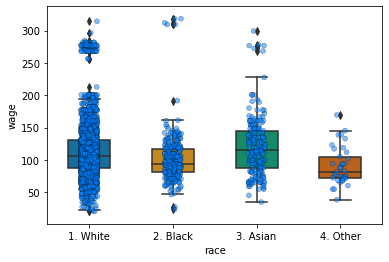

In [148]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='race', y='wage', data=Wage, width=0.5, order = sorted(Wage['race'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='race', y='wage', data=Wage, order = sorted(Wage['race'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

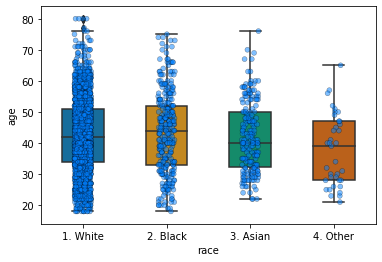

In [149]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='race', y='age', data=Wage, width=0.5, order = sorted(Wage['race'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='race', y='age', data=Wage, order = sorted(Wage['race'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

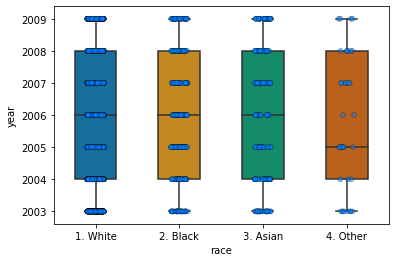

In [150]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='race', y='year', data=Wage, width=0.5, order = sorted(Wage['race'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='race', y='year', data=Wage, order = sorted(Wage['race'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>race~wage/age/year:</h3>

In [151]:
mod = ols('wage ~ race', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
race,3.0,6.321174e+04,21070.581068,12.236674,5.890230e-08
Residual,2996.0,5.158874e+06,1721.920570,NaN,NaN


In [152]:
mod = ols('age ~ race', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
race,3.0,1275.895381,425.298460,3.199304,0.022453
Residual,2996.0,398272.259285,132.934666,NaN,NaN


In [153]:
mod = ols('year ~ race', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
race,3.0,18.600831,6.200277,1.511063,0.209584
Residual,2996.0,12293.356169,4.103256,NaN,NaN


<h2>region:</h2>

In [154]:
sorted(Wage['region'].unique())

['2. Middle Atlantic']

<h2>Boxplot</h2>
<h3>region~wage/age/year:</h3>

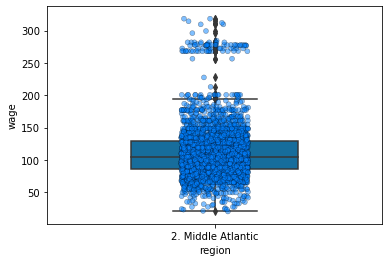

In [155]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='region', y='wage', data=Wage, width=0.5, order = sorted(Wage['region'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='region', y='wage', data=Wage, order = sorted(Wage['region'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

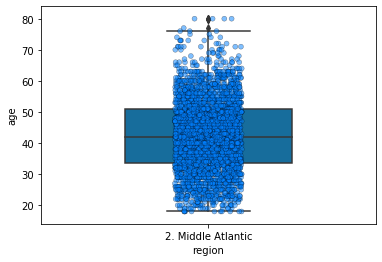

In [156]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='region', y='age', data=Wage, width=0.5, order = sorted(Wage['region'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='region', y='age', data=Wage, order = sorted(Wage['region'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

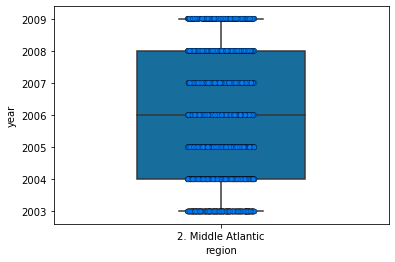

In [157]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='region', y='year', data=Wage, width=0.5, order = sorted(Wage['region'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='region', y='year', data=Wage, order = sorted(Wage['region'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>region~wage/age/year:</h3>

In [158]:
mod = ols('wage ~ region', data=Wage).fit()
#mod.summary()
# --------------------------------------------------------------------
# ValueError: must have at least one row in constraint matrix
# -> has only Middle Atlantic
#---------------------------------------------------------------------
#aov_table = sm.stats.anova_lm(mod, typ=2)
#anova_table(aov_table)

<h2>jobclass:</h2>

In [159]:
sorted(Wage['jobclass'].unique())

['1. Industrial', '2. Information']

<h2>Boxplot</h2>
<h3>jobclass~wage/age/year:</h3>

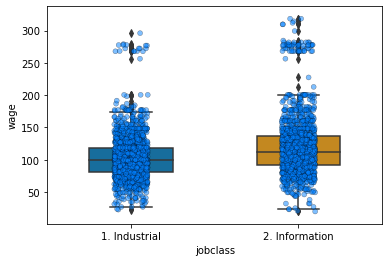

In [160]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='jobclass', y='wage', data=Wage, width=0.5, order = sorted(Wage['jobclass'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='jobclass', y='wage', data=Wage, order = sorted(Wage['jobclass'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

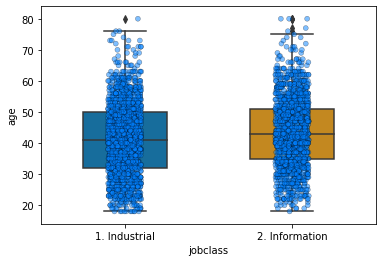

In [161]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='jobclass', y='age', data=Wage, width=0.5, order = sorted(Wage['jobclass'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='jobclass', y='age', data=Wage, order = sorted(Wage['jobclass'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

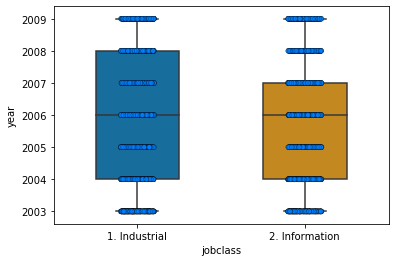

In [162]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='jobclass', y='year', data=Wage, width=0.5, order = sorted(Wage['jobclass'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='jobclass', y='year', data=Wage, order = sorted(Wage['jobclass'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>jobclass~wage/age/year:</h3>

In [163]:
mod = ols('wage ~ jobclass', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
jobclass,1.0,2.235384e+05,223538.413339,134.072585,2.308186e-30
Residual,2998.0,4.998547e+06,1667.293981,NaN,NaN


In [164]:
mod = ols('age ~ jobclass', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
jobclass,1.0,3286.202149,3286.202149,24.862427,6.507352e-07
Residual,2998.0,396261.952517,132.175434,NaN,NaN


In [165]:
mod = ols('year ~ jobclass', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
jobclass,1.0,0.466455,0.466455,0.113588,0.73612
Residual,2998.0,12311.490545,4.106568,NaN,NaN


<h2>health:</h2>

In [166]:
sorted(Wage['health'].unique())

['1. <=Good', '2. >=Very Good']

<h2>Boxplot</h2>
<h3>health~wage/age/year:</h3>

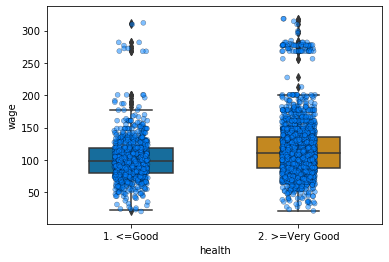

In [167]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health', y='wage', data=Wage, width=0.5, order = sorted(Wage['health'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health', y='wage', data=Wage, order = sorted(Wage['health'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

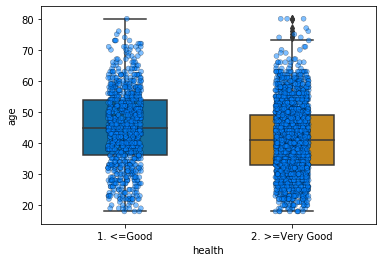

In [168]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health', y='age', data=Wage, width=0.5, order = sorted(Wage['health'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health', y='age', data=Wage, order = sorted(Wage['health'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

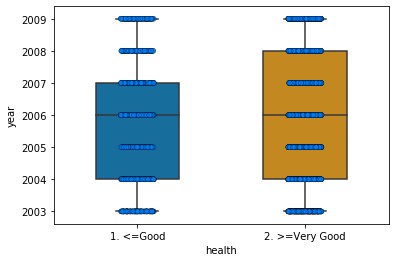

In [169]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health', y='year', data=Wage, width=0.5, order = sorted(Wage['health'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health', y='year', data=Wage, order = sorted(Wage['health'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>health~wage/age/year:</h3>

In [170]:
mod = ols('wage ~ health', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health,1.0,1.211874e+05,121187.409755,71.226641,4.886404e-17
Residual,2998.0,5.100898e+06,1701.433742,NaN,NaN


In [171]:
mod = ols('age ~ health', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health,1.0,7709.394825,7709.394825,58.985399,2.135751e-14
Residual,2998.0,391838.759841,130.700053,NaN,NaN


In [172]:
mod = ols('year ~ health', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health,1.0,0.046234,0.046234,0.011258,0.915506
Residual,2998.0,12311.910766,4.106708,NaN,NaN


<h2>health_ins:</h2>

In [173]:
sorted(Wage['health_ins'].unique())

['1. Yes', '2. No']

<h2>Boxplot</h2>
<h3>health_ins~wage/age/year:</h3>

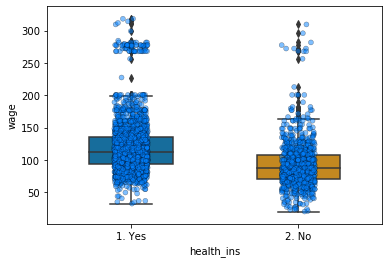

In [174]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health_ins', y='wage', data=Wage, width=0.5, order = sorted(Wage['health_ins'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health_ins', y='wage', data=Wage, order = sorted(Wage['health_ins'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

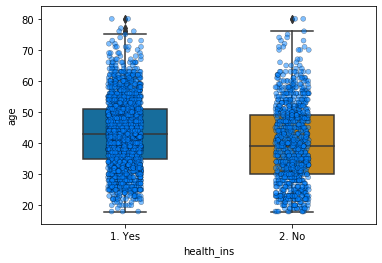

In [175]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health_ins', y='age', data=Wage, width=0.5, order = sorted(Wage['health_ins'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health_ins', y='age', data=Wage, order = sorted(Wage['health_ins'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

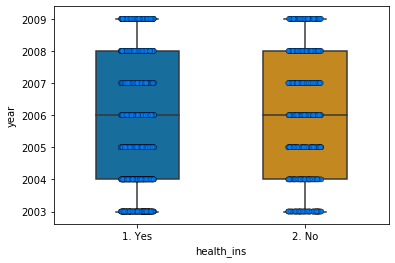

In [176]:
# make boxplot with Seaborn
bplot=sns.boxplot(x='health_ins', y='year', data=Wage, width=0.5, order = sorted(Wage['health_ins'].unique()), palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(x='health_ins', y='year', data=Wage, order = sorted(Wage['health_ins'].unique()), jitter=True, palette=['#0080ff'],
                    edgecolor='black', linewidth=0.4, marker='o', alpha=0.5, color='black')

<h2>Anova Test</h2>
<h3>health_ins~wage/age/year:</h3>

In [177]:
mod = ols('wage ~ health_ins', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health_ins,1.0,4.963846e+05,496384.570620,314.907964,4.465783e-67
Residual,2998.0,4.725701e+06,1576.284589,NaN,NaN


In [178]:
mod = ols('age ~ health_ins', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health_ins,1.0,8123.418006,8123.418006,62.218876,4.268909e-15
Residual,2998.0,391424.736661,130.561954,NaN,NaN


In [179]:
mod = ols('year ~ health_ins', data=Wage).fit()
#mod.summary()
aov_table = sm.stats.anova_lm(mod, typ=2)
anova_table(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
health_ins,1.0,0.805961,0.805961,0.196267,0.657783
Residual,2998.0,12311.151039,4.106455,NaN,NaN


<h2>Interpretation</h2>

<h3>General Boxplot and Anova test assumptions:</h3>

Boxplots display the distribution of data based on a five number summary:  
minimum  
first quartile (25th Percentile)  
median (50th Percentile - the middle value of the dataset)  
third quartile (75th Percentile)  
maximum  

The 'whiskers' extend to points that lie outside but within a certain range (1.5 IQRs) of the lower and upper quartile. Everything outside of this range are outliers.  

The dots (stripplot) on top of the boxplot represents categorical data, where all of the points belonging to one category fall on the same position along the axis corresponding to the categorical variable. In addition, the dots give a sense of how many data points lie within each group.  

Anova test confidence level is assumed to be 95%, which means that we will accept 5% error rate.

<h3>Boxplot education ~ wage/age/year:</h3>

The categorical data is in sorted order along the x-Axis. The distribution of points can be seen easily in the plot. The education ~ wage plot shows that the majority of the points are within the minimum and maximum of each boxplot category. It is visible that < HS Grad has lowest wage, where with HS Grad, Some College education and Advanced Degree have wage higher than 250. The categories < HS Grad, HS Grad and Some College education are the only categories to reach wage levels below what seems to be 25.  
When plotting with education and age, it seems that people with <HS Grad were up to 75 years. 80 year people can be found with a HS Grad and Some college education. Where people with an Advanced degree seem to be no older than 75 years. The highest density among all education groups is between 30 an 50 years.  
The year vs education plot does not show much, except that at each year people from all education groups occur.

<h3>Anova Test education ~ wage/age/year:</h3>
It is observed that the p-values of education ~ wage and ~age are both much less than the level of significance (1% or 0.01). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the education categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude that there are significant differences among the wages and ages among the education categories. The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.

<h3>Boxplot maritl ~ wage/age/year:</h3>
Wage ~ maritl plot shows that people who were never married or people who are married have a wage above 300. It also seems that most points occur at the same two groups (never married and married). Widowed people have least data points and aslo seem to have a least possible high at wage 150. Divorced and separated people seem to have a similar maximum wage of around 275, however, divorced people have a lower minimum with a wage below 50 and separated people around 75.  
Age ~ maritl plot shows that all people aged below 20 are never married. People above ~22 are married or separated. Most data points are amon people who are never married or married. These two categories are also the only categories at age 80. Widowed category has most points between the ages 40 and 60, and has also least points of all categories.  
Year ~ maritl shows again that at almost each year people from all categories have present data points. Except for the widowed category in year 2008, where no data points are present.

<h3>Anova Test maritl ~ wage/age/year:</h3>
It is observed that the p-values of maritl ~ wage and ~age are both much less than the level of significance (1% or 0.01). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the maritl categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude that there are significant differences among the wages and ages among the maritl  categories. The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.

<h3>Boxplot race ~ wage/age/year:</h3>
Wage ~ race shows the category of white to have the most data points. The categories of white and black reach both a wage of above 300. The category of white reaches also the lowest of all with a wage of below what seems to be ~25. Fewest data points has the category Other.  
Age ~ race shows the category of white to have most data points and appears to be the only category with age 80. The other category appears to have least data points and also a lowest of maximum age with reaching only around 63.  
Year ~ race shows that data points appear at every year of every category.

<h3>Anova Test race ~ wage/age/year:</h3>
It is observed that the p-values of race ~ wage and ~age are both much less than the level of significance (5% or 0.05). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the race categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude that there are significant differences among the wages and ages among the race categories.
The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.


<h3>Boxplot region ~ wage/age/year:</h3>
The only category is Middle Atlantic
Wage ~ region All data points occur at most between 50 and 175 at the wage axis. Lowest data points are below 25 and highest data points are above 300.  
Age ~ region All data points occur at most between 25 and 60 at the age axis. Lowest data points are below 20 and highest data points are at 80.  
Year ~ region Data points occur at all years at the year axis in the middle atlantic region.

<h3>Anova Test region ~ wage/age/year:</h3>
Anova test could not be performed since for this test more than one category are needed.

<h3>Boxplot jobclass ~ wage/age/year:</h3>
Wage ~ jobclass The two categories are industrial and information. Both categories seem to have a similar amount of points, however, the infrmation category seems to reach higher wage levels at above 300.  
Age ~ jobclass Both categories contain again a similar amount of data points and even seem to be very similarly distributed this time.  Most data points occur between the ages 25 and 60.  
Year ~ jobclass Data points occur at each year in both categories.

<h3>Anova Test jobclass ~ wage/age/year:</h3>
It is observed that the p-values of jobclass ~ wage and ~age are both much less than the level of significance (5% or 0.05). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the jobclass categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude 
that there are significant differences among the wages and ages among the jobclass categories. The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.


<h3>Boxplot health ~ wage/age/year:</h3>
Wage ~ health The two categories are <=Good and >=Very good. It seems that the very good category has more data points at the wage levels above 250, however, for both categories most data points occur between wages 50 and 150.  
Age ~ health The category very good seems to have more data points and most of them occur between the ages 22 and 60, where the good category has most data points between the ages 35 and 55. Both categories have data points at age 80.  
Year ~ health Data points occur at each year in both categories.

<h3>Anova Test health ~ wage/age/year:</h3>
It is observed that the p-values of health ~ wage and ~age are both much less than the level of significance (5% or 0.05). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the health categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude that there are significant differences among the wages and ages among the health categories. The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.


<h3>Boxplot health_ins ~ wage/age/year:</h3>
Wage ~ health_ins The two categories are Yes and No. Yes seems to have more data points at the wage level above 250. However, the No category ha smore dat apoints at the wage level below 50.  
Age ~ health_ins The yes category seem to have an overall more data points and reaches a higher density above the age 60 than the no category. Again, the no category has more data points below the 25 age level.   
Year ~ health_ins All data points occur at each year in both categories.

<h3>Anova Test health_ins ~ wage/age/year:</h3>
It is observed that the p-values of health_ins ~ wage and ~age are both much less than the level of significance (5% or 0.05). Thus, the null hypothesis of equal mean value can be rejected. In other words, the average wage and age of the health_ins categories are not equal. The p-value obtained from ANOVA analysis is significant (P < 0.05), and therefore, we conclude that there are significant differences among the wages and ages among the health_ins categories. The p-value of year is > 0.05, thus we can not conclude that a significant difference exists.